# 凯撒与哑谜（前传II）

破解密码的核心是猜测密码的可能性，然后验证猜测是否正确。这个过程可以用生成器来实现。
- 凯撒：获得简单迭代器
- 哑谜：获得多种因素复合迭代器

## 凯撒密码配置生成器

接下来实现凯撒密码配置生成器。

In [3]:
def gen_caesar_config():
    # your code here
    for i in range(26):
        yield i
    pass

接下来验证一下凯撒密码配置迭代器的正确性。应该输出数字0-25。

In [5]:
for config in gen_caesar_config():
    print(config)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


## 哑谜机配置生成器

https://py-enigma.readthedocs.io/en/latest/reference.html

（可适当降低问题复杂度，减少组合数量）

- 齿轮

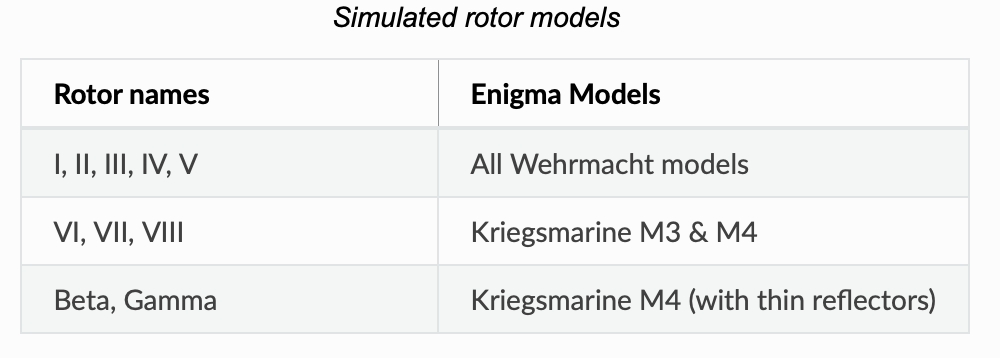
~~~python
rotor_set=["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "Beta", "Gamma"]
~~~

- 反射器

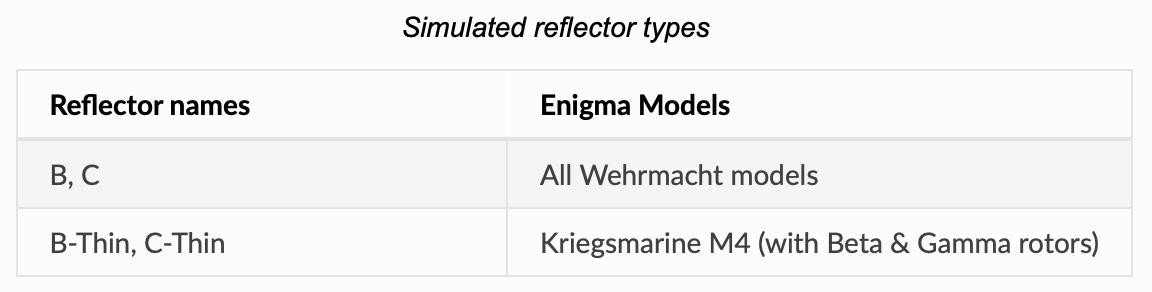
~~~python
reflector_set=["B", "C", "B-Thin", "C-Thin"]
~~~

- 插线板

最多可达10条线（可以不用实现这么多）
~~~python
keys="ABCDEF"
num_plugs=3
~~~

- display

26个英文大写字母中任意三个字母，比如ABC,WER
~~~python
keys="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
~~~

In [7]:
from itertools import product, combinations
def gen_enigma_config():
    # YOUR CODE HERE
    rotors_set = ["I", "II", "III", "IV", "V"]
    reflectors_set = ['B', 'C']
    plug_keys = "ABCDEF"
    list_plug_keys = list(plug_keys)
    original_list = list_plug_keys.copy()
    keys="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    for rotors in product(rotors_set, repeat=3):    
        for reflecor in reflectors_set:
            for display in product(keys, repeat=3):
                for plugboard1 in combinations(list_plug_keys, 2):
                    list_plug_keys = original_list.copy()
                    list_plug_keys.remove(plugboard1[0])
                    list_plug_keys.remove(plugboard1[1])
                    temp_list = list_plug_keys.copy()
                    for plugboard2 in combinations(list_plug_keys, 2):
                        list_plug_keys = temp_list.copy()
                        list_plug_keys.remove(plugboard2[0])
                        list_plug_keys.remove(plugboard2[1])
                        for plugboard3 in combinations(list_plug_keys, 2):
                            list_p = [plugboard1, plugboard2, plugboard3]
                            plugboard = ' '.join([''.join(p) for p in list_p])
                            yield {
                                "rotors": rotors,
                                "reflector": reflecor,
                                "plugboard": plugboard,
                                "display": display,
                            }
   

接下来验证一下哑谜机配置迭代器的正确性。应该输出多种因素组合，其中每个配置是一个字典，包含齿轮、反射器、插线板的配置，如：
```python
{
    "rotors": ["I","IV","II"], 
    "reflector": "B", 
    "plugboard": "AB EZ CX DP KN TY"
    "display": "ZEN",
}
```

In [10]:
c = 0
for config in gen_enigma_config():
    print(config)
    c += 1
    if c> 20:
        break
# 得到的结果像下面这样子
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CD EF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CE DF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CF DE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB DE CF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB DF CE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB EF CD', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BD EF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BE DF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BF DE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC DE BF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC DF BE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC EF BD', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD BC EF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD BE CF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD BF CE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD CE BF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD CF BE', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AD EF BC', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AE BC DF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AE BD CF', 'display': ('A', 'A', 'A')}
# {'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AE BF CD', 'display': ('A', 'A', 'A')}

{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CD EF', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CE DF', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB CF DE', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB DE CF', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB DF CE', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AB EF CD', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BD EF', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BE DF', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC BF DE', 'display': ('A', 'A', 'A')}
{'rotors': ('I', 'I', 'I'), 'reflector': 'B', 'plugboard': 'AC DE BF', 'display': ('A', 'A', 'A')}
{'rotors':